# <center> Визуализация на Python
## <center>Домашняя работа
#### Выполнила: Александра Ольховатова


### Что делать:

- Построить 5 графиков по выбранным данным. 

- Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

- Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [1]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 15,7

In [3]:
# импортируем нужные библиотеки
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

### <center> График №1

In [57]:
player = pd.read_csv('player_data.csv')
player.info()
#выбран параметр 'время жизни в игре' т.к это полные данные по всем игрокам
#хотя наличие нулевых значений в данном случае нам не мешает

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
name          4550 non-null object
year_start    4550 non-null int64
year_end      4550 non-null int64
position      4549 non-null object
height        4549 non-null object
weight        4544 non-null float64
birth_date    4519 non-null object
college       4248 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


In [64]:
#player.sort_values('name', ascending=False)
player.head(5)

,name,year_start,year_end,position,height,weight,birth_date,college,Years_in_the_game
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,4
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,9
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",19
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,10
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,5


In [58]:
player['Years_in_the_game'] = player['year_end']-player['year_start']

In [62]:
#player.head(5)

In [63]:
player_barh = player.sort_values('Years_in_the_game', ascending=False).groupby('Years_in_the_game').count().drop(['year_end', 'year_start', 'position', 'height', 'weight', 'birth_date', 'college' ], axis=1)
player_barh.columns = ['Years old']
#player_barh

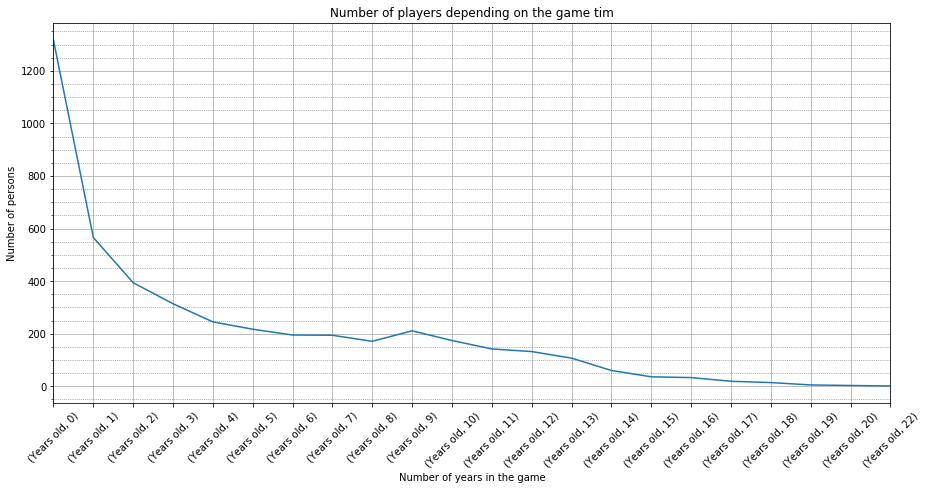

In [24]:
x = np.linspace(0, 22, 1400)
fig, ax = plt.subplots()

#  интервал основных делений OX:
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#  интервал основных делений OY:
ax.yaxis.set_major_locator(ticker.MultipleLocator(200))
#  интервал вспомогательных делений:
ax.yaxis.set_minor_locator(ticker.MultipleLocator(50))

ax.grid(which='minor',
        color = 'gray',
        linestyle = ':')

player_barh.unstack('Years_in_the_game').plot(rot=45)
plt.xlabel('Number of years in the game')
plt.ylabel('Number of persons')
plt.title('Number of players depending on the game tim')
plt.grid()

На графике изображено время игры в команде и количество людей с таким-же периодом. Можно сделать выводы что в команде большая текучесть, большинство играет не более 2 лет. Думаю что такой тип графика лучше показывает этот выброс и резкое угосание, можно сказать первые 4 года это как проверка на прочность, пережил то скорее всего дальше будешь жить стабильнее в игре.

### <center> График №2

In [65]:
player_1 = pd.read_csv('Players.csv')
#player_1.sort_values('Player', ascending=False)

In [66]:
player_1.info()
#как и в графике 1 наличие нулевых значений нас не интересует т.к мы выводим топ 10 самых популярных штатов, где родились игроки

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 8 columns):
Unnamed: 0     3922 non-null int64
Player         3921 non-null object
height         3921 non-null float64
weight         3921 non-null float64
collage        3573 non-null object
born           3921 non-null float64
birth_city     3452 non-null object
birth_state    3439 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 245.2+ KB


In [67]:
#player_1.isnull().sum()

In [68]:
player_barh = player_1.groupby('birth_state').count().drop(['Unnamed: 0', 'height', 'weight', 'collage', 'born', 'birth_city'], axis=1).sort_values('Player', ascending=False).head(10)
player_barh.columns = ['State']
player_barh

,State
birth_state,
California,344
New York,290
Illinois,209
Pennsylvania,163
Ohio,137
Michigan,131
Texas,129
Georgia,118
Louisiana,101


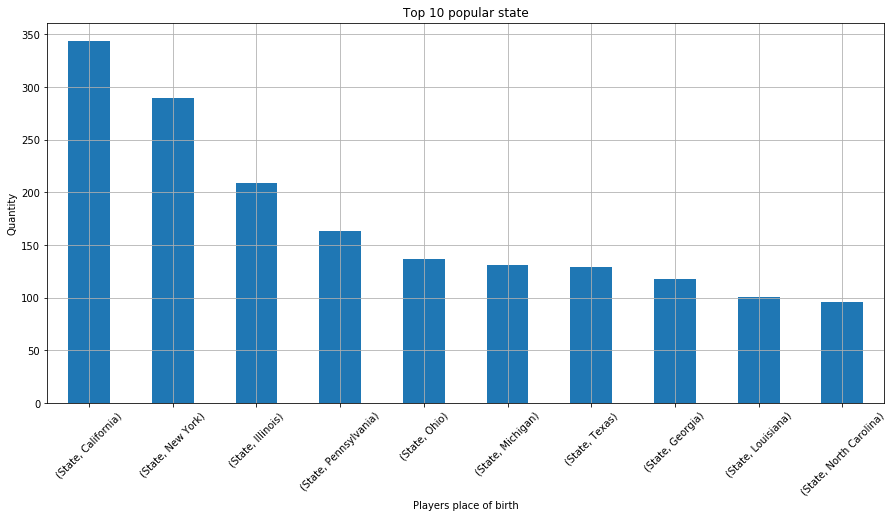

In [69]:
player_barh.unstack().plot(kind='bar', rot=45)
plt.xlabel('Players place of birth')
plt.ylabel('Quantity')
plt.title('Top 10 popular state')
plt.grid()

По графику можно сказать, что многие игроки родились в штате Калифорния. Считаю что с помощью столбчатой диаграммы сравнение более наглядное

### <center> График №3

In [5]:
import seaborn as sns

In [234]:
df_1 = pd.read_csv('player_data.csv')
#Вычисляю время игрока в игре
df_1['Years_in_the_game'] = df_1['year_end']-df_1['year_start']
#Удаляю нулевые строки
df_1.dropna(subset=['birth_date'], inplace=True)

In [235]:
def data_(row):
    year = row['birth_date'][-4:]
    return int(year)

In [236]:
#Выделяю год рождения
df_1['birth_year'] = df_1.apply(data_, axis=1)

In [237]:
#Вычисляю возраст начала игры
df_1['Age_begin_player'] = df_1['year_start']-df_1['birth_year']

In [238]:
#удаляю лишние столбцы
df_1 = df_1.drop(['year_end', 'position', 'height', 'weight', 'college', 'birth_date', 'year_start', 'birth_year' ], axis=1)  

In [223]:
df_1.head(5)

,name,Years_in_the_game,Age_begin_player
0,Alaa Abdelnaby,4,23
1,Zaid Abdul-Aziz,9,23
2,Kareem Abdul-Jabbar,19,23
3,Mahmoud Abdul-Rauf,10,22
4,Tariq Abdul-Wahad,5,24


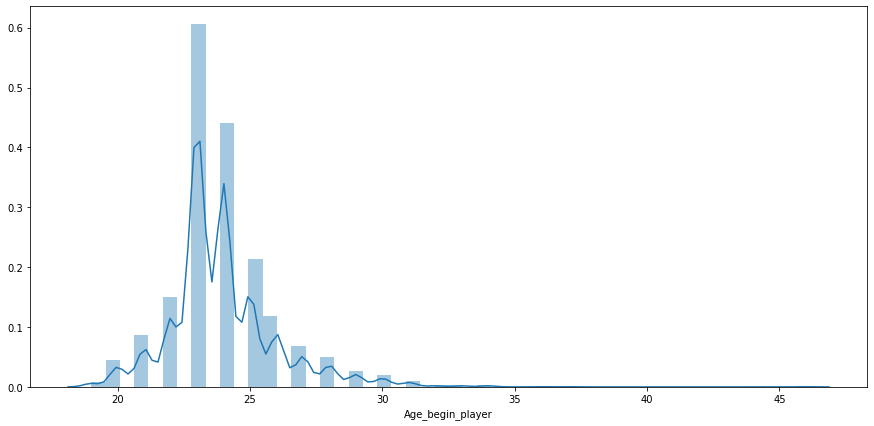

In [240]:
sns.distplot(df_1.Age_begin_player)

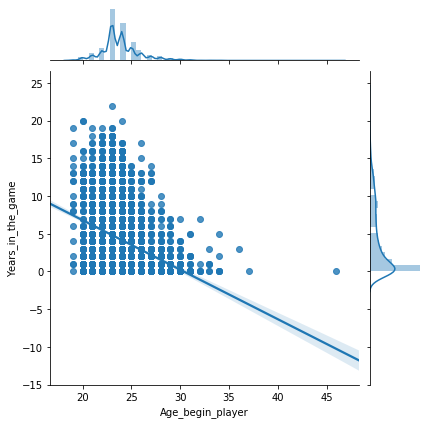

In [243]:
sns.jointplot(x='Age_begin_player', y='Years_in_the_game', data=df_1, kind='reg')

### <center> График №4

In [6]:
import math
from math import sqrt

In [7]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null object
passenger_count       625134 non-null int64
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [8]:
def distance(row):

    #Радиус земли
    EARTH_RADIUS = 6372795

    # перевела координаты в радианы
    lat1 = row['pickup_latitude'] * math.pi / 180
    lat2 = row['dropoff_latitude'] * math.pi / 180
    long1 = row['pickup_longitude'] * math.pi / 180
    long2 = row['dropoff_longitude'] * math.pi / 180
 
    # косинусы и синусы широт и разницы долгот
    cl1 = math.cos(lat1)
    cl2 = math.cos(lat2)
    sl1 = math.sin(lat1)
    sl2 = math.sin(lat2)
    delta = long2 - long1
    cdelta = math.cos(delta)
    sdelta = math.sin(delta)
 
    # вычисления длины большого круга
    y = sqrt(pow(cl2 * sdelta, 2) + pow(cl1 * sl2 - sl1 * cl2 * cdelta, 2))
    x = sl1 * sl2 + cl1 * cl2 * cdelta;
 

    ad = math.atan2(y, x)
    dist = ad * EARTH_RADIUS/1000
 
    return round(dist, 2)


In [9]:
test['distance_km'] = test.apply(distance, axis=1)

In [10]:
test_1 = test.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'pickup_datetime'], axis=1)

In [13]:
test_2 = test_1.groupby('vendor_id').sum()
test_2

,passenger_count,distance_km
vendor_id,,
1,365752,988756.85
2,673074,1158189.67


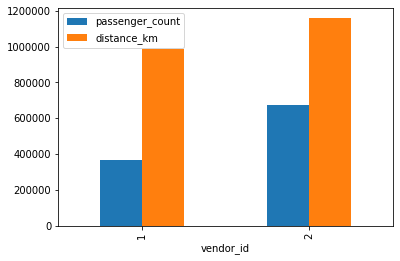

In [15]:
test_2.plot(kind='bar')

В данном датасете были поездки я предполагаю 2 таксистов, одинаковых клиентов я не нашла поэтому провела анализ по таксистам.
Удалось посчитать расстояние приодаленное ими и количество пассажиров перевезенных. Данная столбчатая диаграмма позволяет их сравнить между собой наглядно.

### <center> График №5

In [118]:
world = pd.read_csv('tmdb_5000_movies.csv')

In [119]:
world_1 = world.drop(['overview', 'keywords', 'homepage', 'tagline', 'spoken_languages', 'original_title', 'runtime', 
                      'production_companies', 'production_countries', 'popularity', 'id', 'release_date', 'revenue',
                      'original_language', 'genres'], axis=1)

In [120]:
world_2 = world_1.query('status == "Released"').drop(['status'], axis=1)

In [121]:
count = world_2['vote_count'].mean()
world_2 = world_2.query('vote_count > {}'.format(count)).drop(['vote_count', 'title'], axis=1)

In [124]:
#world_2

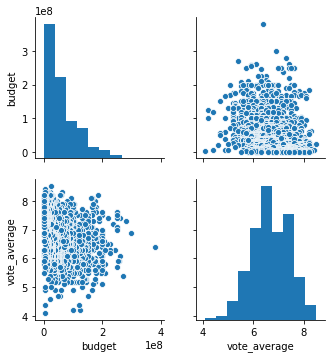

In [123]:
sns_plot = sns.pairplot(world_2)
sns_plot

Увидели распределение значений рейтинга от затраченных денег, можно селать вывод что многие фильмы с высокими рейтингами сняты не на самые большие затраты и даже самые большие затраты не дают самых высоких рейтингов